In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.linear_model import LinearRegression

In [38]:
df = pd.read_excel('sample_data.xls')

In [39]:
df.head()

,Unnamed: 0,date,open,high,low,close,volume
0,0,2022-01-03 09:15:00,252.70,254.25,252.35,252.60,319790
1,1,2022-01-03 09:30:00,252.60,253.65,251.75,252.80,220927
2,2,2022-01-03 09:45:00,252.95,254.90,252.30,252.85,526445
3,3,2022-01-03 10:00:00,252.85,253.15,252.40,252.55,280414
4,4,2022-01-03 10:15:00,252.55,253.10,252.25,252.80,112875


**Answer 1: Basic Statistics from the data.**

In [41]:
df.describe()

,Unnamed: 0,open,high,low,close,volume
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03
mean,999.500000,304.072050,305.112750,303.062375,304.087500,3.995450e+05
std,577.494589,23.117987,23.129187,23.076869,23.100806,4.938786e+05
min,0.000000,249.850000,250.150000,249.000000,249.800000,2.229300e+04
25%,499.750000,293.187500,294.125000,292.112500,293.250000,1.471022e+05
50%,999.500000,306.525000,307.975000,305.550000,306.675000,2.484240e+05
75%,1499.250000,321.700000,322.500000,320.700000,321.650000,4.841755e+05
max,1999.000000,341.100000,344.600000,340.300000,341.050000,8.346762e+06


In [42]:
df.index       

RangeIndex(start=0, stop=2000, step=1)

In [43]:
#calculating the total trade amount
df['total_traded']= df['open']*df['volume']
df.head()

,Unnamed: 0,date,open,high,low,close,volume,total_traded
0,0,2022-01-03 09:15:00,252.70,254.25,252.35,252.60,319790,8.081093e+07
1,1,2022-01-03 09:30:00,252.60,253.65,251.75,252.80,220927,5.580616e+07
2,2,2022-01-03 09:45:00,252.95,254.90,252.30,252.85,526445,1.331643e+08
3,3,2022-01-03 10:00:00,252.85,253.15,252.40,252.55,280414,7.090268e+07
4,4,2022-01-03 10:15:00,252.55,253.10,252.25,252.80,112875,2.850658e+07


<IPython.core.display.Javascript object>


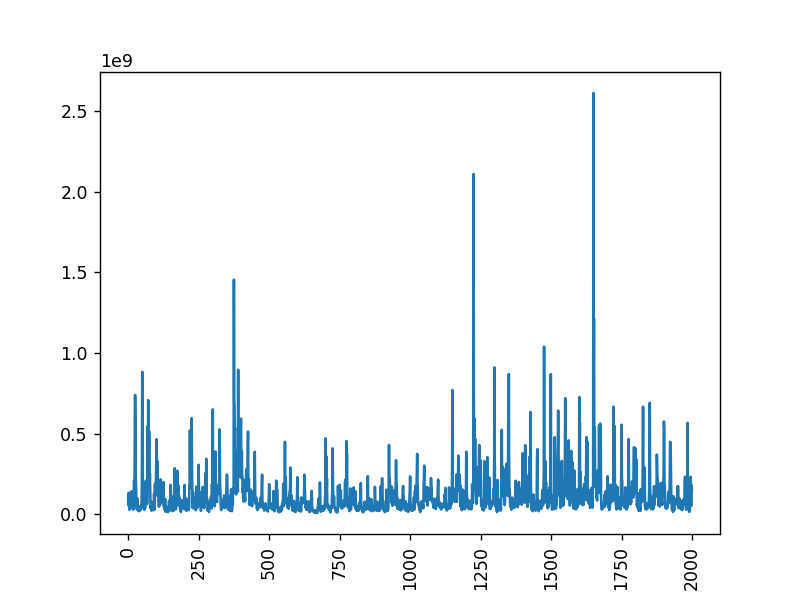

In [44]:
apoints = df['total_traded']
plt.plot( apoints)
plt.xticks(rotation=90)
plt.show()

In [45]:
#calculating return
df['return']=df['close']-df['open']
df.head()

,Unnamed: 0,date,open,high,low,close,volume,total_traded,return
0,0,2022-01-03 09:15:00,252.70,254.25,252.35,252.60,319790,8.081093e+07,-0.10
1,1,2022-01-03 09:30:00,252.60,253.65,251.75,252.80,220927,5.580616e+07,0.20
2,2,2022-01-03 09:45:00,252.95,254.90,252.30,252.85,526445,1.331643e+08,-0.10
3,3,2022-01-03 10:00:00,252.85,253.15,252.40,252.55,280414,7.090268e+07,-0.30
4,4,2022-01-03 10:15:00,252.55,253.10,252.25,252.80,112875,2.850658e+07,0.25


In [46]:
#calculating moving average for the closing price
df['Moving_avg'] = df['close'].rolling(12).mean()    #20 implies average considering closing data of last 3 hours (12*15 minutes)
df.head()

,Unnamed: 0,date,open,high,low,close,volume,total_traded,return,Moving_avg
0,0,2022-01-03 09:15:00,252.70,254.25,252.35,252.60,319790,8.081093e+07,-0.10,NaN
1,1,2022-01-03 09:30:00,252.60,253.65,251.75,252.80,220927,5.580616e+07,0.20,NaN
2,2,2022-01-03 09:45:00,252.95,254.90,252.30,252.85,526445,1.331643e+08,-0.10,NaN
3,3,2022-01-03 10:00:00,252.85,253.15,252.40,252.55,280414,7.090268e+07,-0.30,NaN
4,4,2022-01-03 10:15:00,252.55,253.10,252.25,252.80,112875,2.850658e+07,0.25,NaN


In [47]:
df['Moving_avg']=df['Moving_avg'].fillna(252.60)
df['Exp_avg'] = df['close'].ewm(span=100,adjust = False).mean()

<IPython.core.display.Javascript object>


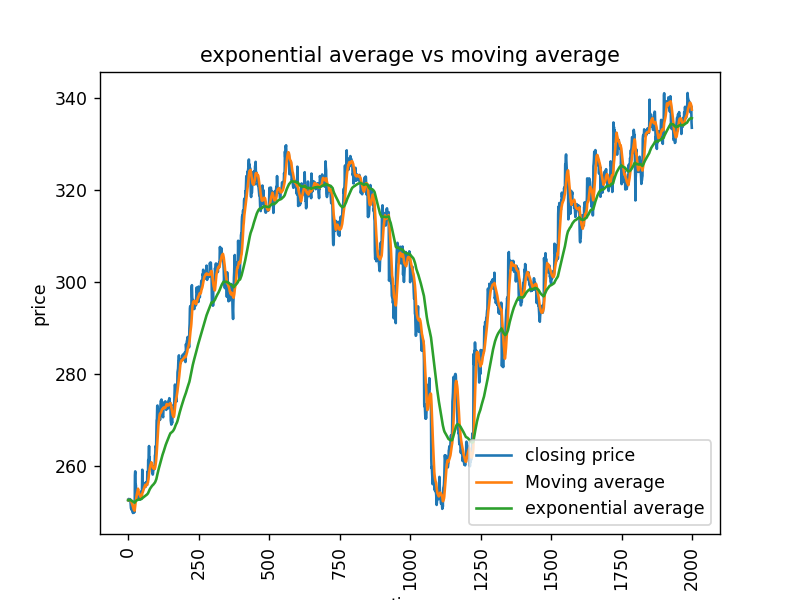

In [48]:
apoints = df['close']
bpoints = df['Moving_avg']
cpoints = df['Exp_avg']

plt.plot( apoints, label= 'closing price')
plt.plot( bpoints, label = 'Moving average')
plt.plot( cpoints, label = 'exponential average')
plt.legend()
plt.title("exponential average vs moving average")
plt.xlabel("time")
plt.ylabel("price")
plt.xticks(rotation=90)
plt.show()
#we see that the exponential average is more close to closing price than moving average

In [49]:
df.head()

,Unnamed: 0,date,open,high,low,close,volume,total_traded,return,Moving_avg,Exp_avg
0,0,2022-01-03 09:15:00,252.70,254.25,252.35,252.60,319790,8.081093e+07,-0.10,252.6,252.600000
1,1,2022-01-03 09:30:00,252.60,253.65,251.75,252.80,220927,5.580616e+07,0.20,252.6,252.603960
2,2,2022-01-03 09:45:00,252.95,254.90,252.30,252.85,526445,1.331643e+08,-0.10,252.6,252.608832
3,3,2022-01-03 10:00:00,252.85,253.15,252.40,252.55,280414,7.090268e+07,-0.30,252.6,252.607667
4,4,2022-01-03 10:15:00,252.55,253.10,252.25,252.80,112875,2.850658e+07,0.25,252.6,252.611476


In [50]:
# using linear regression and sklearn library to predict the closing price 
train_df = df[1:1600]
test_df = df[1600:1999]
X = train_df.drop(columns = ['date','close','total_traded','return'])
Y = train_df['close']

X2 = test_df.drop(columns = ['date','close','total_traded','return'])
Y2 = test_df['close']

mod = LinearRegression()           
mod.fit(X,Y)

mod.score(X2,Y2)

0.9896778065901927

**Using above model we can predict closing price precision of 98.9%**

**Answer 2: The trend we can observe is that trade is highest at beginning of the day and in the middle of the month (from total trade graph)**

**Answer 3: The opening price (9:30am) at which we will buy the stocks is on index 1, 26, 51,..., 1951 and
            the opening price (3:00pm) at which we will sell the stocks is on index 23, 48, 73,..., 1998**

In [51]:
#assuming there are no fractional shares
Returns = [0]
shares_num = [0]
Profit = [100000]
i=0
for x in range(1,1999,25):
    shares_num.append(Profit[i]//df.loc[x].at["close"])
    Returns.append(stocks_num[i+1]*(df.loc[x].at["close"]-df.loc[x+22].at["close"]))
    Profit.append(Profit[i]+Returns[i+1])
    i=i+1

**Profit/loss on each day**

In [52]:
Returns[1:]

[1066.5000000000068,
 217.8000000000045,
 -2739.299999999991,
 -846.0,
 -306.8500000000082,
 -71.00000000001614,
 -2520.0,
 -909.8999999999962,
 -3290.0,
 694.6000000000034,
 -1132.200000000014,
 1524.900000000007,
 -2898.4999999999895,
 2217.600000000013,
 2016.7000000000137,
 -2056.900000000014,
 -3927.399999999997,
 603.0,
 2259.600000000009,
 1497.9999999999905,
 185.24999999999352,
 -14.25000000000324,
 -653.1999999999871,
 1848.7000000000094,
 259.2000000000098,
 1320.2000000000066,
 233.59999999998672,
 -740.0,
 2102.399999999987,
 -30.900000000007026,
 -3944.950000000007,
 634.5,
 243.09999999999025,
 101.5000000000066,
 73.75,
 -790.3999999999896,
 261.8999999999934,
 2716.950000000007,
 -1298.949999999993,
 -973.3500000000106,
 2571.800000000007,
 2428.700000000015,
 -608.5999999999959,
 2131.8000000000065,
 -3654.9000000000046,
 -1354.1999999999957,
 2572.5,
 1838.2000000000041,
 -205.15000000000424,
 713.400000000004,
 -2975.400000000004,
 -547.3999999999963,
 355.300000000

**Max profit and Max loss**

In [53]:
Max_Profit = max(Returns)
Max_Profit

2716.950000000007

In [54]:
Max_loss = min(Returns)
Max_loss

-7928.25

**Total capital  at the end = 91975.15**

In [55]:
Profit[1:]

[101066.5,
 101284.3,
 98545.00000000001,
 97699.00000000001,
 97392.15000000001,
 97321.15,
 94801.15,
 93891.25,
 90601.25,
 91295.85,
 90163.65,
 91688.55,
 88790.05000000002,
 91007.65000000002,
 93024.35000000003,
 90967.45000000003,
 87040.05000000003,
 87643.05000000003,
 89902.65000000004,
 91400.65000000002,
 91585.90000000002,
 91571.65000000002,
 90918.45000000004,
 92767.15000000005,
 93026.35000000006,
 94346.55000000008,
 94580.15000000007,
 93840.15000000007,
 95942.55000000005,
 95911.65000000004,
 91966.70000000003,
 92601.20000000003,
 92844.30000000002,
 92945.80000000002,
 93019.55000000002,
 92229.15000000002,
 92491.05000000002,
 95208.00000000003,
 93909.05000000003,
 92935.70000000003,
 95507.50000000003,
 97936.20000000004,
 97327.60000000005,
 99459.40000000005,
 95804.50000000004,
 94450.30000000005,
 97022.80000000005,
 98861.00000000004,
 98655.85000000003,
 99369.25000000004,
 96393.85000000003,
 95846.45000000004,
 96201.75000000004,
 88273.50000000004,
 